In [91]:
import os
import json
import pandas as pd

folder_path = "/Users/kieranrudd/Library/CloudStorage/OneDrive-TheUniversityofNottingham/BigData/code/src/reports"
data_dict = {}

# Iterate over all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r') as file:
            try:
                json_data = json.load(file)
                # Strip .json to use as index
                row_name = os.path.splitext(filename)[0]
                data_dict[row_name] = json_data["performance"] | json_data["timing"] | json_data["complexity"] # add? 
            except json.JSONDecodeError as e:
                print(f"Error decoding {filename}: {e}")

df = pd.DataFrame.from_dict(data_dict, orient='index').sort_index()
#print(df)

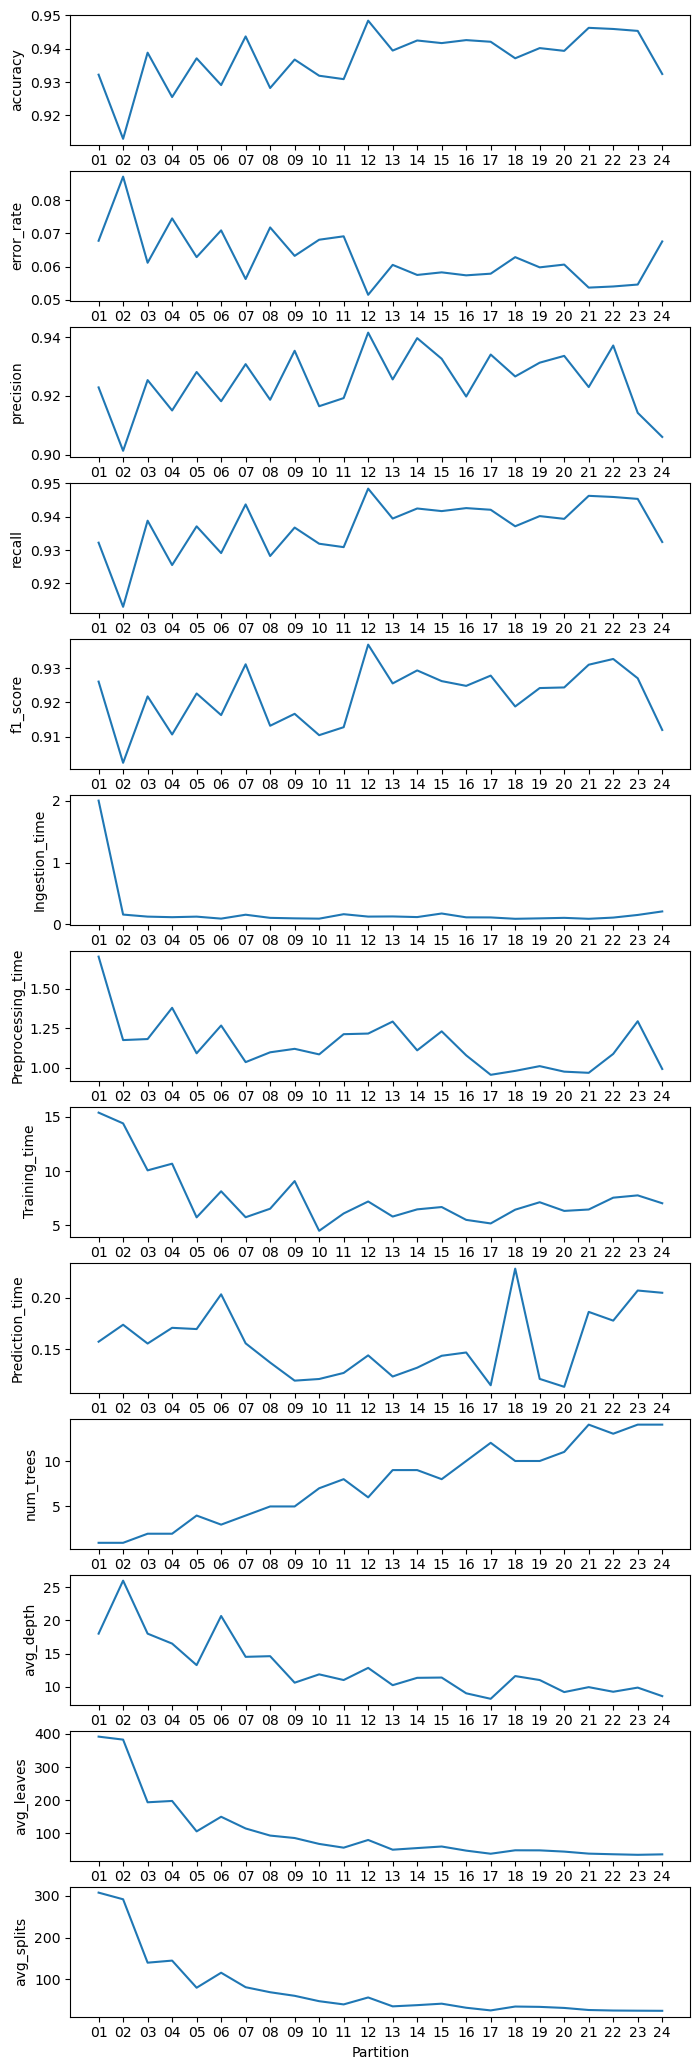

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=13)
fig.set_size_inches(8,26)
i = 0
for col in df:
    vals = df[col]
    ax[i].plot(vals.index, vals.values)
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Partition')
    i +=1